# ELECTRICITY PRICE PREDICTION

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv')

/var/folders/j8/f23r7m5n62l6j13r9vn5pvxc0000gn/T/ipykernel_55220/1111259063.py:1: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv')


In [3]:
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [5]:
df = df.replace('?', 0)

In [6]:
df['ForecastWindProduction'] = df['ForecastWindProduction'].astype(float)
df['SystemLoadEA'] = df['SystemLoadEA'].astype(float)
df['SMPEA'] = df['SMPEA'].astype(float)
df['ORKTemperature'] = df['ORKTemperature'].astype(float)
df['ORKWindspeed'] = df['ORKWindspeed'].astype(float)
df['CO2Intensity'] = df['CO2Intensity'].astype(float)
df['ActualWindProduction'] = df['ActualWindProduction'].astype(float)
df['SystemLoadEP2'] = df['SystemLoadEP2'].astype(float)
df['SMPEP2'] = df['SMPEP2'].astype(float)

In [7]:
df['DateTime'] = pd.to_datetime(df['DateTime'],errors='coerce')

df['date'] = df['DateTime'].dt.date
df['hour'] = df['DateTime'].dt.hour

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DateTime                38014 non-null  datetime64[ns]
 1   Holiday                 38014 non-null  object        
 2   HolidayFlag             38014 non-null  int64         
 3   DayOfWeek               38014 non-null  int64         
 4   WeekOfYear              38014 non-null  int64         
 5   Day                     38014 non-null  int64         
 6   Month                   38014 non-null  int64         
 7   Year                    38014 non-null  int64         
 8   PeriodOfDay             38014 non-null  int64         
 9   ForecastWindProduction  38014 non-null  float64       
 10  SystemLoadEA            38014 non-null  float64       
 11  SMPEA                   38014 non-null  float64       
 12  ORKTemperature          38014 non-null  float6

In [10]:
df.isnull().sum()

DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
date                      0
hour                      0
dtype: int64

In [13]:
df = df.drop(columns=['DateTime', 'Holiday', 'date','hour'])

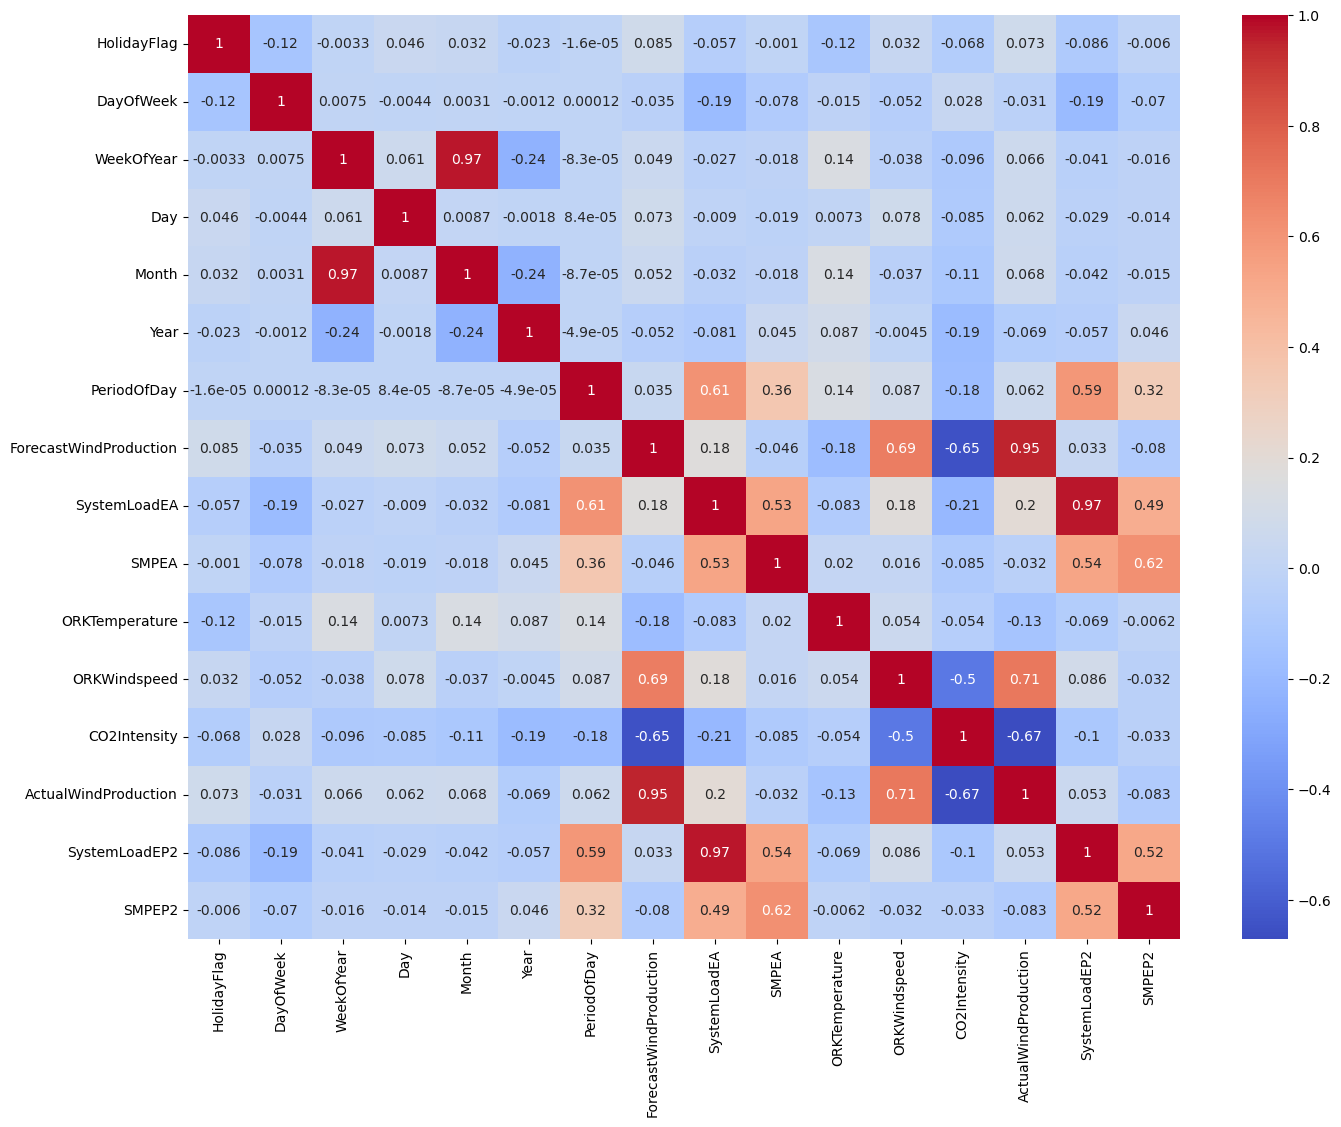

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
correlations = df.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
x = df[["Day", "Month", "ForecastWindProduction", "SystemLoadEA", 
          "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity", 
          "ActualWindProduction", "SystemLoadEP2"]]
y = df["SMPEP2"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [17]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
 
explained_variance = pca.explained_variance_ratio_

In [20]:
  
 


from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [22]:
features = np.array([[10, 12]])
model.predict(features)

array([56.0435])